# Libraries

In [37]:
import os
import sys
sys.path.append('/home/kurose/Desktop/master/viu_master_thesis')

import importlib
import models.model_utils

importlib.reload(models.model_utils)
from models.model_utils import load_dataset, get_input_shape, f1_score, get_callbacks, save_and_print_model, get_metrics, plot_metrics

import tensorflow as tf

tf.random.set_seed(42)


# Model 1

## Dataset 

In [38]:

train, val, _ = load_dataset(batch_size=2)

## Architecture

In [39]:
def model_v1(input_shape):
    inputs = tf.keras.Input(shape=input_shape)

    # Convolutional Layer 1
    x = tf.keras.layers.Conv3D(32, kernel_size=(3, 3, 3), activation='relu', padding='same')(inputs)
    x = tf.keras.layers.MaxPooling3D(pool_size=(2, 2, 2))(x)
    
    # Convolutional Layer 2
    x = tf.keras.layers.Conv3D(64, kernel_size=(3, 3, 3), activation='relu', padding='same')(x)
    x = tf.keras.layers.MaxPooling3D(pool_size=(2, 2, 2))(x)
    
    # Flatten the output from 3D to 1D for Dense Layers
    x = tf.keras.layers.Flatten()(x)
    
    # Fully Connected Dense Layer
    x = tf.keras.layers.Dense(128, activation='relu')(x)
    
    # Output Layer
    outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)
    
    # Build the model
    model = tf.keras.Model(inputs, outputs)
    
    return model

In [41]:
input_shape = get_input_shape(train)
model = model_v1(input_shape)
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=get_metrics())

In [44]:
save_and_print_model(model, file_path="model_v1.png")

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 33, 128, 128,   │             0 │
│                                 │ 1)                     │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3d_12 (Conv3D)              │ (None, 33, 128, 128,   │           896 │
│                                 │ 32)                    │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d_12 (MaxPooling3D) │ (None, 16, 64, 64, 32) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3d_13 (Conv3D)              │ (None, 16, 64, 64, 64) │        55,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d_13 (MaxPooling3D) │ (None, 8, 32, 32, 64)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 524288)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │    67,108,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 201,496,133 (768.65 MB)

 Trainable params: 67,165,377 (256.22 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 134,330,756 (512.43 MB)

Model architecture saved to model_v1.png


# Training

In [42]:
callbacks = get_callbacks(
    checkpoint_path='best_model_v1.weights.h5',
    monitor_metric='val_accuracy',
    patience=10,
    reduce_factor=0.1,
    reduce_patience=5,
    reduce_min_lr=1e-6)
              
history = model.fit(train, validation_data=val, epochs=50, callbacks=callbacks)

Epoch 1/50


      8/Unknown 43s 5s/step - accuracy: 0.5625 - auc: 0.4336 - f1_score: 0.3836 - loss: 186.2896

/usr/lib/python3.11/contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


8/8 ━━━━━━━━━━━━━━━━━━━━ 47s 6s/step - accuracy: 0.5556 - auc: 0.4375 - f1_score: 0.3657 - loss: 180.4036 - val_accuracy: 0.7500 - val_auc: 1.0000 - val_f1_score: 0.3333 - val_loss: 0.5513 - learning_rate: 0.0010
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 41s 5s/step - accuracy: 0.7220 - auc: 0.7909 - f1_score: 0.4428 - loss: 0.5198 - val_accuracy: 0.2500 - val_auc: 0.2500 - val_f1_score: 0.0000e+00 - val_loss: 1.4825 - learning_rate: 0.0010
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 41s 5s/step - accuracy: 1.0000 - auc: 0.8889 - f1_score: 0.4928 - loss: 0.1815 - val_accuracy: 0.0000e+00 - val_auc: 0.0000e+00 - val_f1_score: 0.2222 - val_loss: 2.3201 - learning_rate: 0.0010
Epoch 4/50


2024-10-08 19:12:29.755450: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


8/8 ━━━━━━━━━━━━━━━━━━━━ 43s 5s/step - accuracy: 1.0000 - auc: 1.0000 - f1_score: 0.4225 - loss: 0.0832 - val_accuracy: 0.0000e+00 - val_auc: 0.0000e+00 - val_f1_score: 0.0000e+00 - val_loss: 9.6428 - learning_rate: 0.0010
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 42s 5s/step - accuracy: 1.0000 - auc: 1.0000 - f1_score: 0.3908 - loss: 6.8798e-04 - val_accuracy: 0.0000e+00 - val_auc: 0.0000e+00 - val_f1_score: 0.0000e+00 - val_loss: 18.4268 - learning_rate: 0.0010
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 41s 5s/step - accuracy: 0.9689 - auc: 1.0000 - f1_score: 0.2693 - loss: 0.0782 - val_accuracy: 0.0000e+00 - val_auc: 0.0000e+00 - val_f1_score: 0.2222 - val_loss: 10.2801 - learning_rate: 0.0010
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 42s 5s/step - accuracy: 1.0000 - auc: 0.8889 - f1_score: 0.5650 - loss: 0.0012 - val_accuracy: 0.2500 - val_auc: 0.0000e+00 - val_f1_score: 0.2778 - val_loss: 9.7825 - learning_rate: 1.0000e-04
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 41s 5s/step - accuracy: 1.0000 - auc: 1.0

Plot saved to model_v1_metrics.png


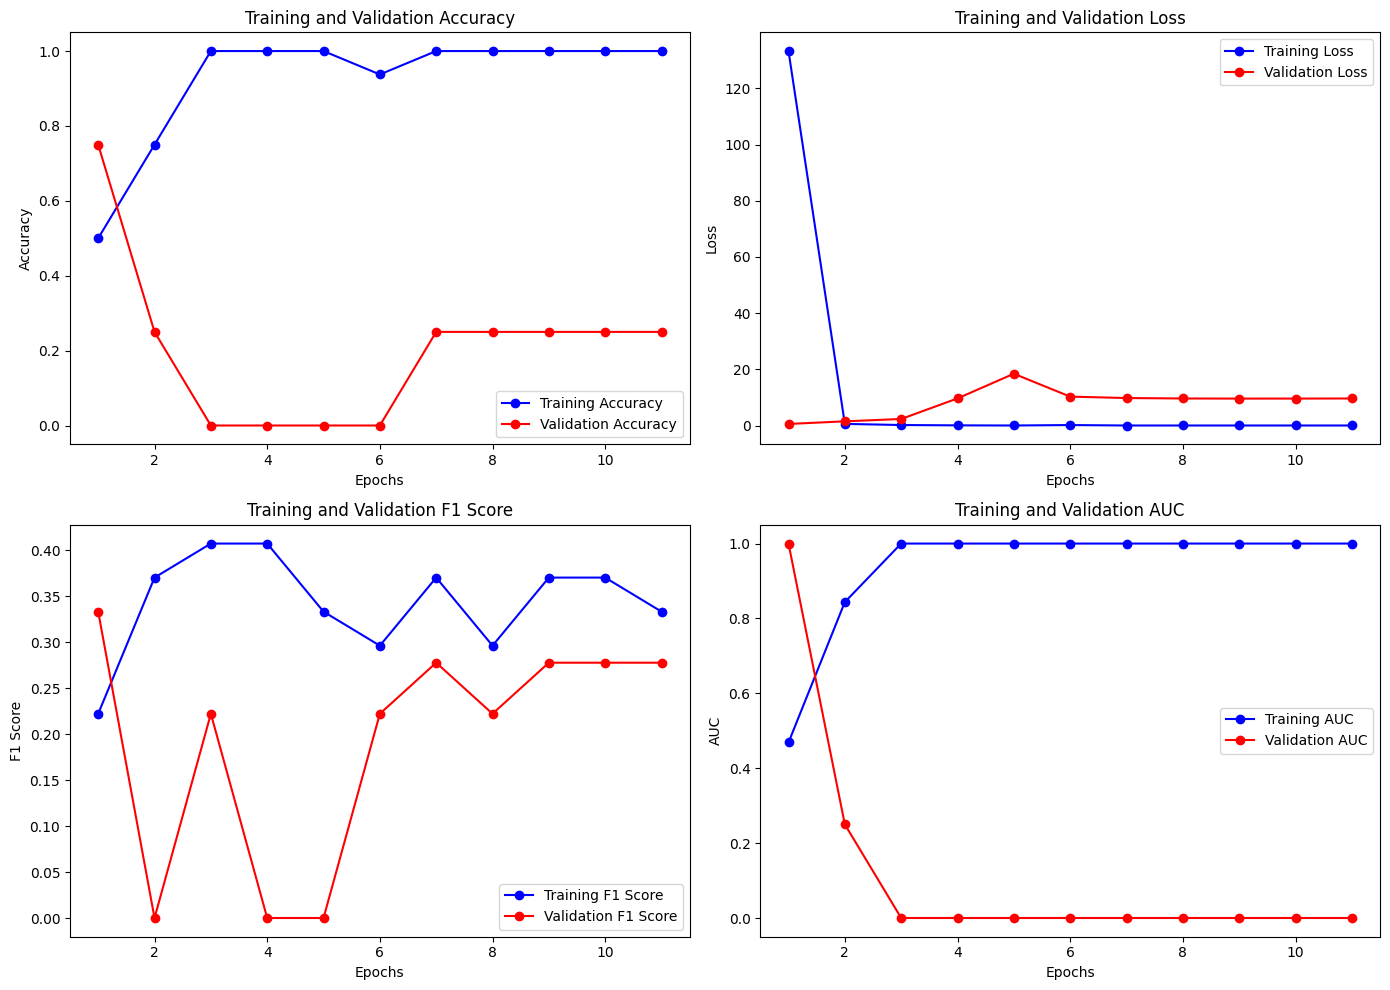

In [43]:
plot_metrics(history, "model_v1_metrics.png")